# Liar Dataset: Naive Bayes and Passive Aggressive Classifier

In [3]:
%load_ext autoreload
%autoreload 2

## General Imports

In [2]:
from datasets import load_dataset
import tqdm as notebook_tqdm
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Labels \\
0 ~ false \\
1 ~ half-true \\
2 ~ mostly true \\
3 ~ true \\
4 ~ barely true \\
5 ~ pants on fire \\

## Dataset Pre-processing

In [3]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, f1_score


In [4]:
dataset = load_dataset('liar')

In [5]:
trainds = dataset['train']
testds = dataset['test']
validationds = dataset['validation']

In [6]:
x_train = trainds['statement']
y_train = trainds['label']
x_test = testds['statement']
y_test = testds['label']
print(y_train)
#binarize data
label_mapping = {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5:0}
y_train = [label_mapping[label] for label in y_train]
y_test = [label_mapping[label] for label in y_test]

print(len(y_train))



[0, 1, 2, 0, 1, 3, 4, 1, 1, 2, 2, 1, 0, 2, 4, 1, 3, 4, 1, 2, 0, 2, 2, 1, 4, 0, 2, 1, 0, 2, 3, 4, 0, 2, 2, 3, 3, 3, 5, 3, 0, 1, 5, 5, 0, 1, 5, 0, 5, 3, 4, 4, 0, 3, 4, 1, 1, 4, 0, 2, 0, 2, 3, 2, 0, 5, 3, 0, 4, 4, 3, 4, 2, 2, 2, 3, 0, 4, 0, 1, 3, 1, 0, 0, 3, 1, 2, 2, 4, 0, 0, 3, 2, 1, 4, 4, 3, 2, 3, 2, 0, 5, 2, 2, 0, 3, 1, 3, 1, 0, 2, 1, 1, 4, 3, 2, 2, 5, 5, 0, 2, 2, 3, 2, 2, 3, 2, 0, 5, 1, 2, 2, 2, 4, 3, 0, 3, 5, 4, 2, 0, 4, 2, 2, 1, 3, 0, 1, 0, 4, 2, 4, 0, 1, 5, 3, 0, 1, 1, 4, 4, 4, 1, 1, 0, 4, 0, 5, 2, 1, 3, 1, 1, 2, 1, 0, 2, 1, 3, 3, 3, 3, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 5, 1, 3, 2, 0, 0, 1, 5, 2, 4, 0, 4, 0, 4, 0, 0, 0, 3, 3, 0, 3, 2, 4, 3, 3, 0, 1, 1, 2, 1, 3, 4, 2, 3, 3, 4, 1, 1, 2, 1, 2, 2, 1, 5, 2, 4, 4, 3, 0, 3, 2, 2, 1, 1, 3, 4, 0, 1, 1, 2, 2, 4, 0, 1, 3, 3, 0, 2, 4, 5, 0, 3, 5, 4, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 4, 1, 4, 0, 3, 1, 2, 0, 4, 4, 1, 2, 0, 0, 5, 3, 2, 4, 4, 4, 5, 0, 2, 2, 5, 2, 0, 5, 2, 1, 0, 1, 1, 3, 3, 4, 4, 1, 4, 1, 3, 5, 1, 4, 4, 4, 3, 4, 0, 1, 1, 0, 4, 4, 5, 2, 0, 

# Passive Aggressive Classifier with TFIDF

In [23]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(testds['statement'])

In [24]:
pac = PassiveAggressiveClassifier(max_iter=3000,early_stopping=True, shuffle=True, random_state=595)

pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')


Accuracy: 56.9%


Attempting to improve the PAssive Aggressive Classifier by tuning hyperparameters, including C - the aggressiveness parameter

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, .0000010, .000100], 'max_iter': [100, 20, 10, 1500]}
pac = PassiveAggressiveClassifier()
grid_search = GridSearchCV(pac, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(tfidf_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_pac = grid_search.best_estimator_
y_pred_tuned = best_pac.predict(tfidf_test)
score_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {round(score_tuned * 100, 2)}%')


/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

Best Parameters:  {'C': 1e-06, 'max_iter': 100}
Tuned Model Accuracy: 64.15%


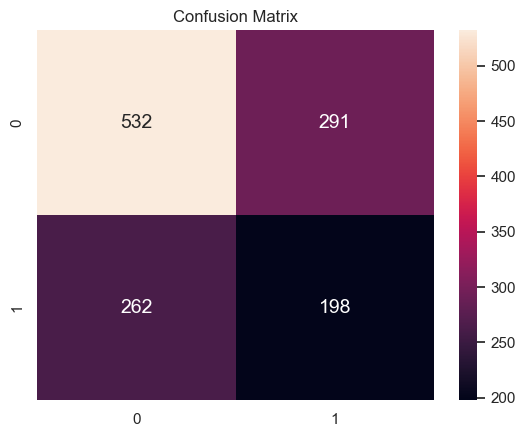


Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       823
           1       0.40      0.43      0.42       460

    accuracy                           0.57      1283
   macro avg       0.54      0.54      0.54      1283
weighted avg       0.57      0.57      0.57      1283



In [26]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))

# PAC with GLoVe embeddings

In [27]:
from gensim.models import KeyedVectors
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from datasets import load_dataset
import pandas as pd
from glove_embedding import embed_glove, load_glove, retrieve_unk

import gensim
import pickle

assert int(gensim.__version__.split(".")[0]) >= 4

import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

embedding_dict = load_glove("glove.6B.50d.txt")
unknown_embedding = retrieve_unk(embedding_dict)
pad_len = 15

train_sentences = x_train
X_train = embed_glove(train_sentences, embedding_dict, pad_len, unknown_embedding)
test_sentences = x_test
X_test = embed_glove(test_sentences, embedding_dict, pad_len, unknown_embedding)

# Hyperparameter Tuning
param_grid = {'C': [0.1, .000001, 10, 0.000001], 'max_iter': [90, 20, 100, 1500]}
pac = PassiveAggressiveClassifier()
grid_search = GridSearchCV(pac, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_pac = grid_search.best_estimator_

# Cross-Validation
cv_scores = cross_val_score(best_pac, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train and Evaluate with the Best Parameters
best_pac.fit(X_train, y_train)
y_pred_tuned = best_pac.predict(X_test)
score_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {round(score_tuned * 100, 2)}%')


Cross-Validation Scores: [0.64459591 0.6436222  0.64410906 0.64410906 0.64490989]
Mean CV Accuracy: 0.6442692219949337
Tuned Model Accuracy: 64.15%


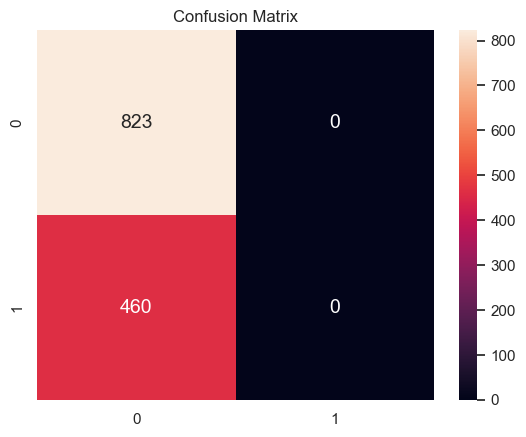


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       823
           1       0.00      0.00      0.00       460

    accuracy                           0.64      1283
   macro avg       0.32      0.50      0.39      1283
weighted avg       0.41      0.64      0.50      1283



/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaraeltawil/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [28]:
cm = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred_tuned > 0.5)))

# Naive Bayes with TFIDF

In [29]:
from naive_bayes import train, predict, evaluate

trainds = dataset['train']
testds = dataset['test']
train_data = trainds['statement']
train_labels = trainds['label']

test_data = testds['statement']
test_label = testds['label']


trained_model = train(x_train, y_train)
model_predictions, ground_truth = predict(trained_model, x_test, y_test)
accuracy = evaluate(model_predictions, ground_truth)

print('Accuracy: %s' % str(accuracy))

processed data 10269 105
2.0
processed data 1283 40
Accuracy: 0.6554949337490257


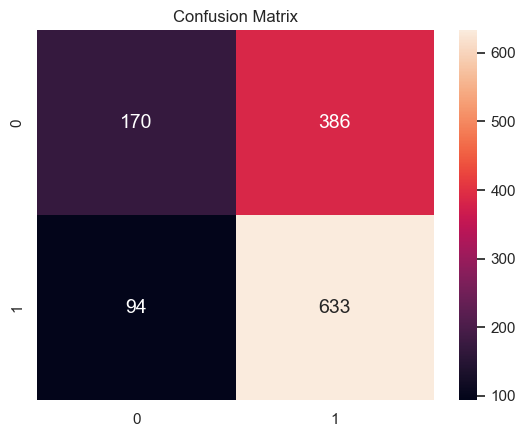


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.31      0.41       556
           1       0.62      0.87      0.73       727

    accuracy                           0.63      1283
   macro avg       0.63      0.59      0.57      1283
weighted avg       0.63      0.63      0.59      1283



In [19]:
cm = confusion_matrix(y_test, model_predictions, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (model_predictions > 0.5)))

In [9]:
from naive_bayes import train, predict, evaluate

trainds = dataset['train']
testds = dataset['test']
train_data = trainds['statement']
train_labels = trainds['label']

test_data = testds['statement']
test_label = testds['label']

trained_model = train(x_train, y_train)
model_predictions, ground_truth = predict(trained_model, x_test, y_test)
accuracy = evaluate(model_predictions, ground_truth)

print('Accuracy: %s' % str(accuracy))

processed data 10269 105
2.0
processed data 1283 40
Accuracy: 0.6554949337490257
